In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the csv file from the drive 
df = pd.read_csv("/content/drive/MyDrive/csv3/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
temp = pd.get_dummies(df["region"])
temp.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [6]:
df.drop("region", axis=1, inplace =True)

In [7]:
df.head(10)

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86
5,31,female,25.7,0,no,3756.62
6,46,female,33.4,1,no,8240.59
7,37,female,27.7,3,no,7281.51
8,37,male,29.8,2,no,6406.41
9,60,female,25.8,0,no,28923.14


In [8]:
#Combining the two dataframes
df = pd.concat([df,temp], axis=1)
df.head(10)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,female,27.9,0,yes,16884.92,0,0,0,1
1,18,male,33.8,1,no,1725.55,0,0,1,0
2,28,male,33.0,3,no,4449.46,0,0,1,0
3,33,male,22.7,0,no,21984.47,0,1,0,0
4,32,male,28.9,0,no,3866.86,0,1,0,0
5,31,female,25.7,0,no,3756.62,0,0,1,0
6,46,female,33.4,1,no,8240.59,0,0,1,0
7,37,female,27.7,3,no,7281.51,0,1,0,0
8,37,male,29.8,2,no,6406.41,1,0,0,0
9,60,female,25.8,0,no,28923.14,0,1,0,0


In [9]:
map = {"yes":1, "no":0}
df["smoker"] = df["smoker"].map(map)
map1 = {"female":0, "male":1}
df["sex"] = df["sex"].map(map1)
df.head(10)

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
5,31,0,25.7,0,0,3756.62,0,0,1,0
6,46,0,33.4,1,0,8240.59,0,0,1,0
7,37,0,27.7,3,0,7281.51,0,1,0,0
8,37,1,29.8,2,0,6406.41,1,0,0,0
9,60,0,25.8,0,0,28923.14,0,1,0,0


In [10]:
df.corr()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.198576,-0.138091,-0.135992,0.270144,-0.006398
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138091,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135992,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270144,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006398,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


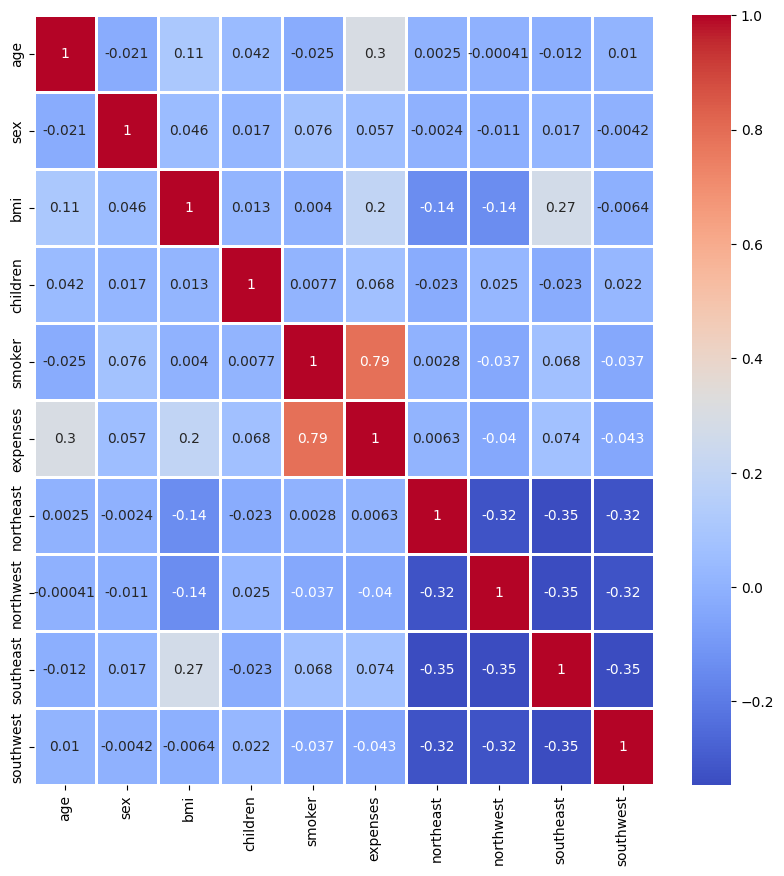

In [11]:
#Correlation Heatmap to find highly correlated values
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap= "coolwarm", annot = True, linewidth= 2)
plt.show()

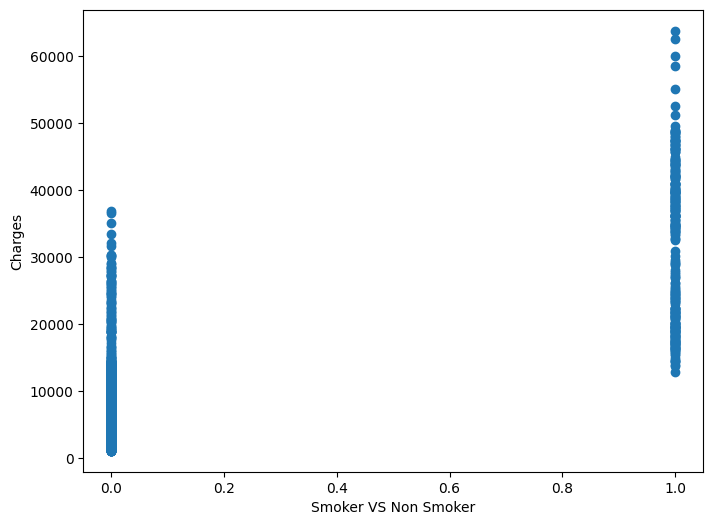

In [12]:
#Scatter plot on target based on smoker
x = df["smoker"]
y = df["expenses"]
plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.xlabel("Smoker VS Non Smoker")
plt.ylabel("Charges")
plt.show()

It is clearly visible that smokers have high medical cost (14,000-60,000+) compared to non smokers (0-38,000).

In [13]:
Y = df['expenses']
X = df.drop('expenses', axis=1)

In [14]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,0,1,0,0
1334,18,0,31.9,0,0,1,0,0,0
1335,18,0,36.9,0,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,0,1


In [15]:
Y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
#Splitting the data into 50% for training and 50% for testing 
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=0.2)

In [17]:
print(x_test.shape, x_train.shape, y_train.shape, y_test.shape)

(268, 9) (1070, 9) (1070,) (268,)


In [18]:
from sklearn.linear_model import LinearRegression
#Training a Linear Regression Model
reg=LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
#Checking the R Squared mean on the test data
r2_score(y_test, y_pred)

0.7623400859008541

In [20]:
#Storing Independent features in a temporary variable
p_x = X

In [21]:
from sklearn.preprocessing import PolynomialFeatures
#Changing the data to a third degree polymial
pol = PolynomialFeatures(degree=3)
P_x=pol.fit_transform(X)
P_x

array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [22]:
#Training the model similarly but with 3rd degree polymial of X this time
x_train, x_test, y_train, y_test = train_test_split(P_x,Y, random_state=1, test_size= 0.15)
reg= LinearRegression().fit(x_train, y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.8420597645673333

In [23]:
#CroessValidating the score to check and avoid overfitting 
from sklearn.model_selection import cross_val_score
c = cross_val_score(reg, P_x, Y, cv=4)
c

array([0.84867974, 0.79021224, 0.85202701, 0.81605385])

In [24]:
#Final Mean Accuracy 
print("Mean accuracy after cross validation", c.mean()*100,end="%")

Mean accuracy after cross validation 82.67432107723448%

**Conclusion:** We have successfully identified the pattern in the data and the 3rd degree polymial regression has given a good accuracy of 82% of cross validation. 